In [1]:
import finesse.virgo
import numpy as np

finesse.init_plotting()

In [2]:
virgo = finesse.virgo.Virgo(maxtem='off')
virgo.make(dc_lock=False)

Adjusting recycling cavity lengths...
Pretuning...
Optimizing demodulation phases...
Optimizing lock gains...
Running RF locks...
Done.


(<Figure size 768x768 with 4 Axes>,
 array([<PolarAxesSubplot:title={'center':'B2_8, phase=-3.466°'}>,
        <PolarAxesSubplot:title={'center':'B2_56, phase=-63.32°'}>,
        <PolarAxesSubplot:title={'center':'B2_6, phase=-9.653°'}>,
        <PolarAxesSubplot:title={'center':'B1p_56, phase=41.7°'}>],
       dtype=object))

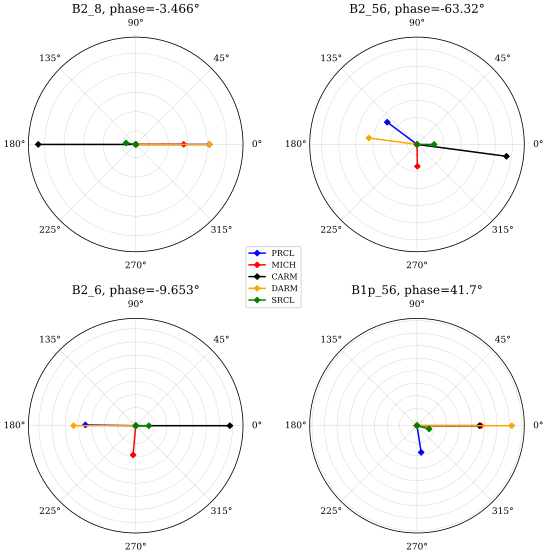

In [3]:
virgo.plot_sensing_matrix()

<PolarAxesSubplot:title={'center':'B2_8, phase=-3.466'}>

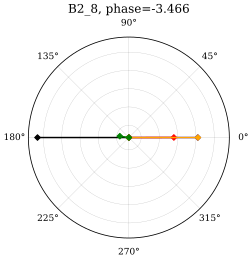

In [3]:
# virgo.plot_sensing_matrix()
virgo.plot_radar('B2_8')

In [ ]:
virgo.plot_DARM()

In [ ]:
# virgo.sensing_W_to_m(1, 'DARM', 'B2_8_I', inverse=True)
sm = virgo.get_sensing_matrix()

for j,readout in enumerate(virgo.unique_readouts):
    for i,dof in enumerate(virgo.dofs):
        print(dof, readout, np.abs(sm.out[i,j]), np.angle(sm.out[i,j], deg=True))

In [ ]:
# The sensing matrix is calculated by taking the gradient of readouts due to small changes to the DOFs.
sm = virgo.get_sensing_matrix().display()
print(sm)

# sm.plot(2, 3, dofs=['DARM'], readouts=['B1p_56']);
sm.plot(2, 2, readouts=virgo.unique_readouts)

In [ ]:
sm.out[1,1]

In [ ]:
virgo.get_dofs_by_component().keys()

In [ ]:
# convert from W to m...?
virgo.sensing_W_to_m(1, 'DARM', 'B1p_56_I')

In [ ]:
virgo.print_tunings()
virgo.set_tunings({
    'NE': 1,
    'WE': 1,
    'NI': 1,
    'WI': 1,
    'PR': 1,
    'SR': 1,
})
virgo.print_tunings()

In [ ]:
def see_beam(virgo):
    v2 = virgo.deepcopy()
    v2.model.parse("""
    ccd ccd1 PR.p1.o xlim=0.1 ylim=0.1 npts=100 w0_scaled=false
    """)
    out = v2.model.run()
    out.plot()

virgo.model.modes(maxtem=30)

virgo.apply_aperture('PR', 1)
see_beam(virgo)
virgo.apply_aperture('PR', 0.01)
see_beam(virgo)